In [4]:
import pandas as pd 
import numpy as np 
df=pd.read_excel("../Data/Original_bank_transactions.xlsx")

In [5]:
df

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT,.
0,409000611074',2017-06-29,TRF FROM Indiaforensic SERVICES,NaN,2017-06-29,NaN,1000000.0,1.000000e+06,.
1,409000611074',2017-07-05,TRF FROM Indiaforensic SERVICES,NaN,2017-07-05,NaN,1000000.0,2.000000e+06,.
2,409000611074',2017-07-18,FDRL/INTERNAL FUND TRANSFE,NaN,2017-07-18,NaN,500000.0,2.500000e+06,.
3,409000611074',2017-08-01,TRF FRM Indiaforensic SERVICES,NaN,2017-08-01,NaN,3000000.0,5.500000e+06,.
4,409000611074',2017-08-16,FDRL/INTERNAL FUND TRANSFE,NaN,2017-08-16,NaN,500000.0,6.000000e+06,.
...,...,...,...,...,...,...,...,...,...
116196,409000362497',2019-03-05,TRF TO 1196428 Indiaforensic SE,NaN,2019-03-05,117934.30,NaN,-1.901902e+09,.
116197,409000362497',2019-03-05,FDRL/INTERNAL FUND TRANSFE,NaN,2019-03-05,NaN,300000.0,-1.901602e+09,.
116198,409000362497',2019-03-05,FDRL/INTERNAL FUND TRANSFE,NaN,2019-03-05,NaN,300000.0,-1.901302e+09,.
116199,409000362497',2019-03-05,IMPS 05-03-20194C,NaN,2019-03-05,109868.65,NaN,-1.901412e+09,.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116201 entries, 0 to 116200
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Account No           116201 non-null  object        
 1   DATE                 116201 non-null  datetime64[ns]
 2   TRANSACTION DETAILS  113702 non-null  object        
 3   CHQ.NO.              905 non-null     float64       
 4   VALUE DATE           116201 non-null  datetime64[ns]
 5   WITHDRAWAL AMT       53549 non-null   float64       
 6   DEPOSIT AMT          62652 non-null   float64       
 7   BALANCE AMT          116201 non-null  float64       
 8   .                    116201 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 8.0+ MB


fixing inconsistencies and data types and fixing Null values

In [7]:
df.drop(columns=".",inplace=True)

In [8]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="most_frequent")

In [9]:
df["Account No"]=df["Account No"].str.replace("'","")
df["Account No"]=pd.to_numeric(df["Account No"])
df["Account No"].value_counts(dropna=False)

1196428         48779
409000362497    29840
409000438620    13454
1196711         10536
409000493210     6014
409000438611     4588
409000611074     1093
409000493201     1044
409000425051      802
409000405747       51
Name: Account No, dtype: int64

In [10]:
df["DATE"].unique()

array(['2017-06-29T00:00:00.000000000', '2017-07-05T00:00:00.000000000',
       '2017-07-18T00:00:00.000000000', ...,
       '2018-04-29T00:00:00.000000000', '2018-05-12T00:00:00.000000000',
       '2018-05-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [11]:
df["VALUE DATE"]=pd.to_datetime(df["VALUE DATE"],utc=False)

In [12]:
df["CHQ.NO."].describe()
df["CHQ.NO."].value_counts(dropna=False)
df["CHQ.NO."]=imputer.fit_transform(df[["CHQ.NO."]])

In [13]:
df["VALUE DATE"].value_counts(dropna=False)
df["VALUE DATE"].astype("datetime64[as]")

0        2017-06-29
1        2017-07-05
2        2017-07-18
3        2017-08-01
4        2017-08-16
            ...    
116196   2019-03-05
116197   2019-03-05
116198   2019-03-05
116199   2019-03-05
116200   2019-03-05
Name: VALUE DATE, Length: 116201, dtype: datetime64[ns]

In [14]:
df.columns

Index(['Account No', 'DATE', 'TRANSACTION DETAILS', 'CHQ.NO.', 'VALUE DATE',
       'WITHDRAWAL AMT', 'DEPOSIT AMT', 'BALANCE AMT'],
      dtype='object')

In [15]:
df["DEPOSIT AMT"].value_counts(dropna=False)

NaN            53549
15000000.00     4350
200000.00       2838
10000000.00     2713
14900000.00     1756
               ...  
135300.00          1
3510.71            1
17553.54           1
153.36             1
30200.00           1
Name: DEPOSIT AMT, Length: 20146, dtype: int64

In [16]:
df["BALANCE AMT"].value_counts(dropna=False)
df["BALANCE AMT"].describe()

count    1.162010e+05
mean    -1.404852e+09
std      5.348202e+08
min     -2.045201e+09
25%     -1.690383e+09
50%     -1.661395e+09
75%     -1.236888e+09
max      8.500000e+06
Name: BALANCE AMT, dtype: float64

SCALING

In [17]:
import matplotlib.pyplot as plt

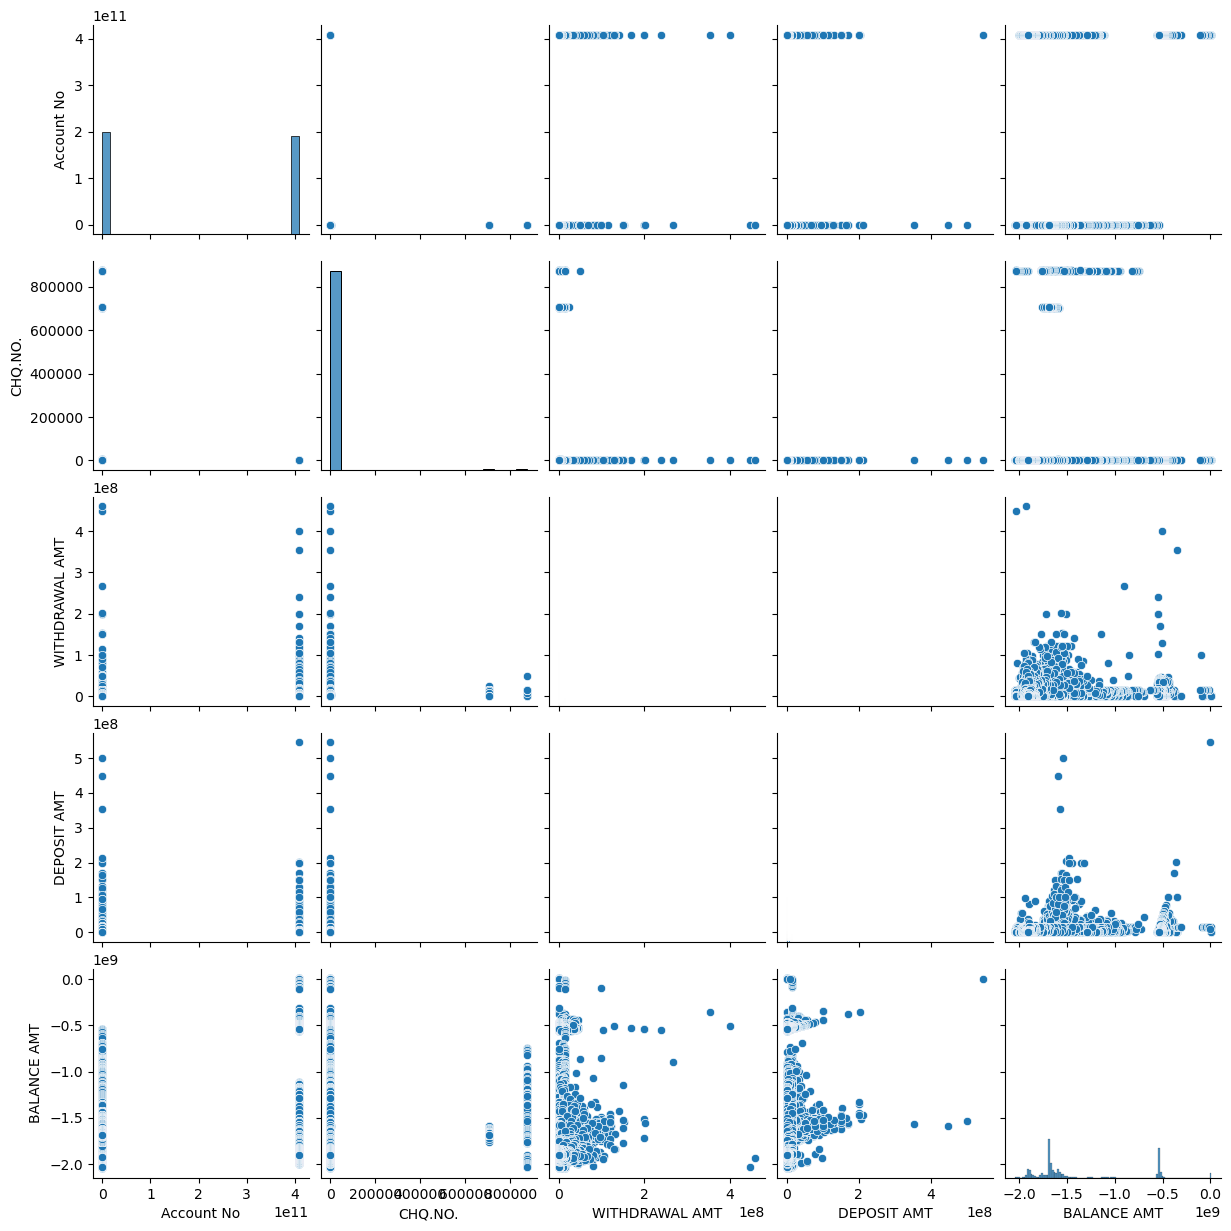

In [18]:
import seaborn as sns
sns.pairplot(df)

In [19]:
from sklearn.preprocessing import MinMaxScaler
num_feat=["DEPOSIT AMT","WITHDRAWAL AMT"]
scaler=MinMaxScaler()
for i in num_feat:
    df[i]=scaler.fit_transform(df[[i]])

In [20]:
df

,Account No,DATE,TRANSACTION DETAILS,CHQ.NO.,VALUE DATE,WITHDRAWAL AMT,DEPOSIT AMT,BALANCE AMT
0,409000611074,2017-06-29,TRF FROM Indiaforensic SERVICES,2.0,2017-06-29,NaN,0.001836,1.000000e+06
1,409000611074,2017-07-05,TRF FROM Indiaforensic SERVICES,2.0,2017-07-05,NaN,0.001836,2.000000e+06
2,409000611074,2017-07-18,FDRL/INTERNAL FUND TRANSFE,2.0,2017-07-18,NaN,0.000918,2.500000e+06
3,409000611074,2017-08-01,TRF FRM Indiaforensic SERVICES,2.0,2017-08-01,NaN,0.005507,5.500000e+06
4,409000611074,2017-08-16,FDRL/INTERNAL FUND TRANSFE,2.0,2017-08-16,NaN,0.000918,6.000000e+06
...,...,...,...,...,...,...,...,...
116196,409000362497,2019-03-05,TRF TO 1196428 Indiaforensic SE,2.0,2019-03-05,0.000257,NaN,-1.901902e+09
116197,409000362497,2019-03-05,FDRL/INTERNAL FUND TRANSFE,2.0,2019-03-05,NaN,0.000551,-1.901602e+09
116198,409000362497,2019-03-05,FDRL/INTERNAL FUND TRANSFE,2.0,2019-03-05,NaN,0.000551,-1.901302e+09
116199,409000362497,2019-03-05,IMPS 05-03-20194C,2.0,2019-03-05,0.000239,NaN,-1.901412e+09


In [21]:
df.to_excel("../Data/transactions.xlsx",index=False)

MODELLING

PREDICT BALANCE BASED ON ACCOUNT NO AND YEAR

In [22]:
import pandas as pd

In [23]:
df=pd.read_excel("../Data/transactions.xlsx")

In [24]:
correlation=df.corr()
correlation["BALANCE AMT"]

C:\Users\palan\AppData\Local\Temp\ipykernel_296280\748517912.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


Account No        0.455069
CHQ.NO.          -0.023315
WITHDRAWAL AMT   -0.153841
DEPOSIT AMT      -0.055840
BALANCE AMT       1.000000
Name: BALANCE AMT, dtype: float64

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
df["YEAR"]=df["VALUE DATE"].dt.year
df["MONTH"]=df["VALUE DATE"].dt.month
df["DAY"]=df["VALUE DATE"].dt.day
df["DAYOFWEEK"]=df["VALUE DATE"].dt.dayofweek
X=df[["Account No","YEAR"]].values
y=df["BALANCE AMT"].values

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [28]:
from sklearn.model_selection import GridSearchCV
params={
    "n_estimators":[50,100],
    "max_depth":[16,32,64],
    "min_samples_split":[4,5,6],
    "min_samples_leaf":[6,7,8]
}
Regressor=RandomForestRegressor()
gridsearch=GridSearchCV(Regressor,param_grid=params,cv=5)
gridsearch.fit(X_train,y_train)
best_regressor=gridsearch.best_estimator_
best_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=32, min_samples_leaf=6, min_samples_split=6,
                      n_estimators=50)

In [29]:
best_regressor.score(X_train,y_train)

0.9702776403769364

In [30]:
y_pred=best_regressor.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9711530522029953

In [33]:
import pickle 
pickle.dump(best_regressor,open("../Models/regressor.sav","wb"))

In [34]:
testing=[[409000611074,2020]]
pred=best_regressor.predict(testing)
predicted=pred[0]

score=r2_score(y_test,y_pred)
print(f"Predicted Balance for the account no 409000611074 by the year 2020 is: {predicted:.2f} and this model has accuracy of {score*100:.2f}%")

Predicted Balance for the account no 409000611074 by the year 2020 is: 1247845.67 and this model has accuracy of 97.12%


TRANSACTION DENSITY 

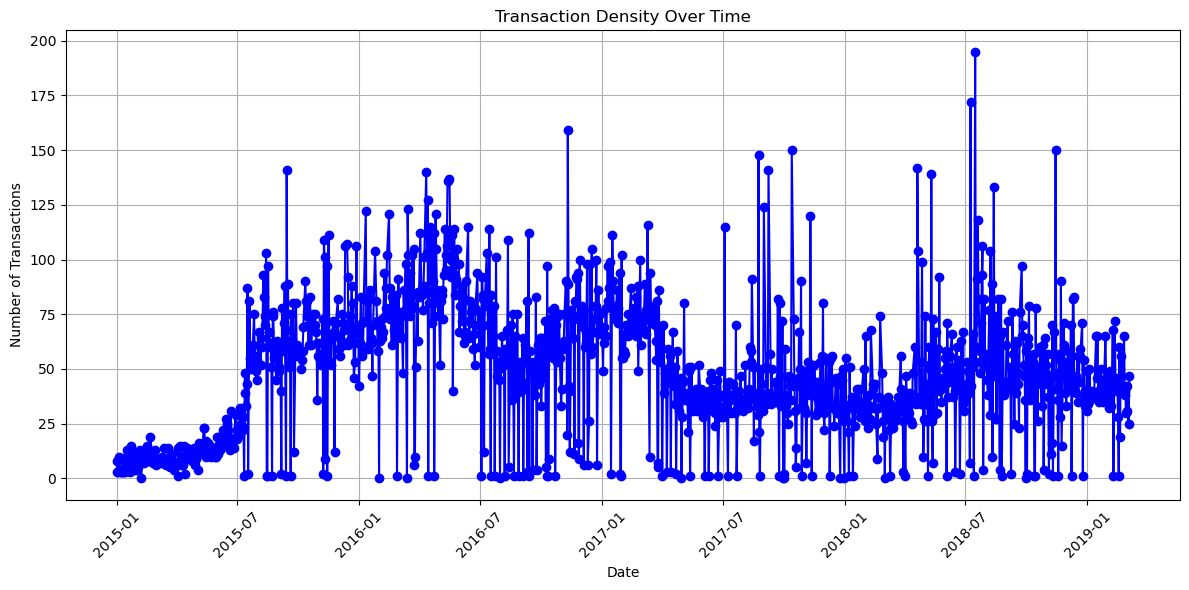

Average daily transaction density is 48.42 <br> Maximum daily transaction density is 195 <br> Minimum daily transaction density is 0


In [101]:
transaction_density = df.groupby("VALUE DATE")["DEPOSIT AMT"].count()
plt.figure(figsize=(12, 6))
plt.plot(transaction_density.index, transaction_density.values, marker='o', linestyle='-', color='b')
plt.title('Transaction Density Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
avg_transaction_density = transaction_density.mean()
max_transaction_density = transaction_density.max()
min_transaction_density = transaction_density.min()
print(f"Average daily transaction density is {avg_transaction_density:.2f} <br> Maximum daily transaction density is {max_transaction_density} <br> Minimum daily transaction density is {min_transaction_density}")


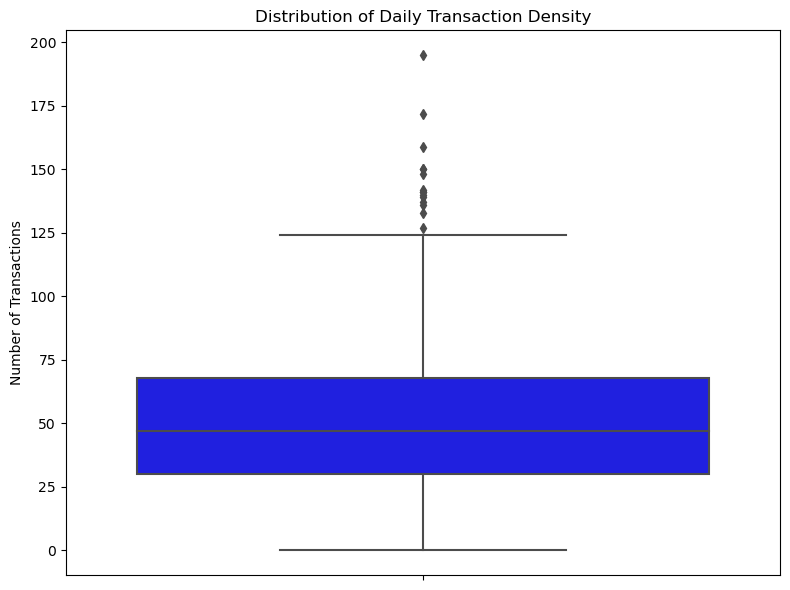

In [102]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=transaction_density.values, color='b')
plt.title('Distribution of Daily Transaction Density')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

BALANCE EVOLUTION